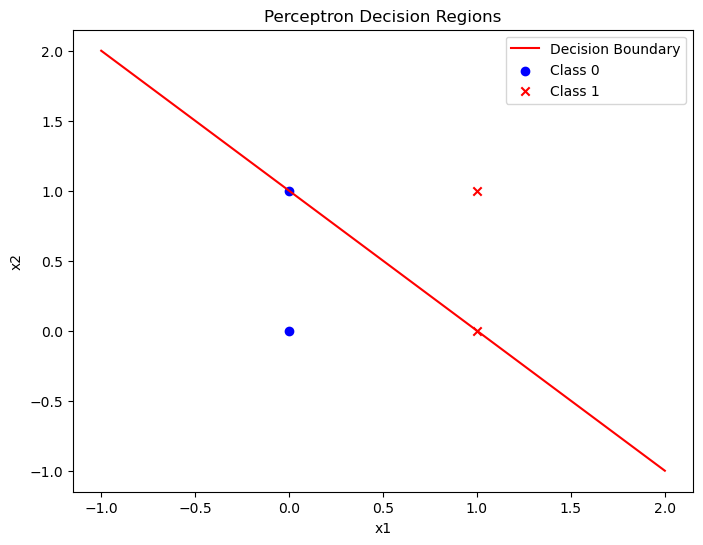

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Initialize the weights
W = np.array([0, 0])
b = 0
learning_rate = 1

# Perceptron Learning Rule
epochs = 10
for epoch in range(epochs):
    for i in range(len(X)):
        x_i = X[i]
        y_i = y[i]
        
        # Calculate the predicted output
        output = np.dot(W, x_i) + b
        
        # Update the weights
        if y_i == 1 and output < 0:
            W += learning_rate * x_i
            b += learning_rate
        elif y_i == 0 and output >= 0:
            W -= learning_rate * x_i
            b -= learning_rate
            
# Plot the decision regions
x1 = np.linspace(-1, 2, 100)
x2 = -(W[0] * x1 + b) / W[1]

plt.figure(figsize=(8, 6))
plt.plot(x1, x2, 'r-', label='Decision Boundary')
plt.scatter(X[:2, 0], X[:2, 1], marker='o', c='b', label='Class 0')
plt.scatter(X[2:, 0], X[2:, 1], marker='x', c='r', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron Decision Regions')
plt.legend()
plt.show()

In [2]:
from sklearn.linear_model import Perceptron

In [9]:
Perceptron.fit(x,y)

AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

In [12]:
perceptron.ipynb

NameError: name 'perceptron' is not defined

In [4]:
# x=X
import numpy as np

In [6]:
np.dot([0.2037659 , 0.27634703],[1 ,1])+0.08953524626443518

0.5696481762644352

In [9]:
import numpy as np

class ART1:
    def __init__(self, vigilance=0.4, choice_param=0.01):
        self.vigilance = vigilance
        self.choice_param = choice_param
        self.weights = None
        self.num_clusters = 0
        self.cluster_members = []

    def train(self, data):
        for pattern in data:
            self.learn(pattern)

    def learn(self, pattern):
        if self.weights is None:
            self.weights = np.zeros((1, len(pattern)))
            self.num_clusters = 1
            self.cluster_members.append([])
        else:
            best_match, best_match_idx = self.find_best_match(pattern)
            if best_match >= self.vigilance:
                self.update_weights(best_match_idx, pattern)
                self.cluster_members[best_match_idx].append(pattern)
            else:
                self.weights = np.vstack((self.weights, pattern))
                self.num_clusters += 1
                self.cluster_members.append([pattern])

    def find_best_match(self, pattern):
        choice_values = self.choice_param + np.sum(self.weights * pattern, axis=1)
        best_match_idx = np.argmax(choice_values)
        best_match = np.sum(self.weights[best_match_idx] * pattern) / (np.sum(pattern) + 1e-8)
        return best_match, best_match_idx

    def update_weights(self, idx, pattern):
        self.weights[idx] = np.minimum(self.weights[idx], pattern)

    def print_clusters(self):
        for i, cluster in enumerate(self.cluster_members):
            print(f"Cluster {i}:")
            for pattern in cluster:
                print(pattern)
            print()

# Example usage
data = np.array([[1, 1, 0, 0],
                 [1, 0, 1, 0],
                 [1, 0, 0, 1],
                 [0, 1, 1, 0],
                 [0, 1, 0, 1],
                 [0, 0, 1, 1]])

art = ART1()
art.train(data)
art.print_clusters()

Cluster 0:

Cluster 1:
[1 0 1 0]
[1 0 0 1]

Cluster 2:
[0 1 1 0]
[0 1 0 1]

Cluster 3:
[0 0 1 1]



In [2]:
import numpy as np
y=np.array([[0],[1],[0],[1],[0],[1],[0],[1],[0],[1]])

In [3]:
y.shape[1]

1

In [10]:
import numpy as np

def initialize_weights(input_dim, category):
    weights = np.random.uniform(size=(input_dim,))
    weights /= np.sum(weights)
    return weights

def calculate_similarity(input_pattern, weights):
    return np.minimum(input_pattern, weights).sum()

def update_weights(input_pattern, weights, vigilance):
    while True:
        activation = calculate_similarity(input_pattern, weights)
        if activation >= vigilance:
            return weights
        else:
            weights[np.argmax(input_pattern)] += 1
            weights /= np.sum(weights)

def ART_neural_network(input_patterns, vigilance):
    num_patterns, input_dim = input_patterns.shape
    categories = []

    for pattern in input_patterns:
        matched_category = None
        for category in categories:
            if calculate_similarity(pattern, category["weights"]) >= vigilance:
                matched_category = category
                break

        if matched_category is None:
            weights = initialize_weights(input_dim, len(categories))
            matched_category = {"weights": weights, "patterns": []}
            categories.append(matched_category)

        matched_category["patterns"].append(pattern)
        matched_category["weights"] = update_weights(pattern, matched_category["weights"], vigilance)

    return categories

# Example usage
input_patterns = np.array([[1, 0, 1, 0], [0, 1, 0, 1], [1, 1, 1, 0],[0,1,1,1]])
vigilance = 0.5

categories = ART_neural_network(input_patterns, vigilance)

# Print the learned categories
for i, category in enumerate(categories):
    print(f"Category {i+1}:")
    print("Patterns:")
    [print(pattern) for pattern in category["patterns"]]
    print("Weights:")
    print(category["weights"])
    print()

Category 1:
Patterns:
[1 0 1 0]
[1 1 1 0]
Weights:
[0.58363371 0.04593106 0.13478762 0.23564761]

Category 2:
Patterns:
[0 1 0 1]
[0 1 1 1]
Weights:
[0.40040602 0.21976337 0.02853442 0.35129619]



In [16]:
#Assignments: 9 
#Write a python program to design a Hopfield Network which stores 4 vectors

import numpy as np
# Define the 4 vectors to be stored
vectors = np.array([[1, 1, -1, -1],
                    [-1, -1, 1, 1],
                    [1, -1, 1, -1],
                    [-1, 1, -1, 1]])

# Calculate the weight matrix
weights = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        if i == j:
            weights[i, j] = 0
        else:
            weights[i, j] = np.sum(vectors[i] * vectors[j])
print(weights)
# Define the activation function (in this case, a sign function)
def activation(x):
    return np.where(x >= 0, 1, -1)

# Define the Hopfield network function
def hopfield(input_vector, weights):
    output_vector = activation(np.dot(weights, input_vector))
    return output_vector

# Test the Hopfield network with one of the stored vectors as input
input_vector = [ 1,  -1, -1,- 1]
output_vector = hopfield(input_vector, weights)
print("Input vector:")
print(input_vector)
print("Output vector:")
print(output_vector)

[[ 0. -4.  0.  0.]
 [-4.  0.  0.  0.]
 [ 0.  0.  0. -4.]
 [ 0.  0. -4.  0.]]
Input vector:
[1, -1, -1, -1]
Output vector:
[ 1 -1  1  1]
